In [166]:
import pandas as pd
import requests
import datetime as dt

In [167]:
import datetime as dt
b = []

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + dt.timedelta(n)

end = dt.date(2021, 4, 23)
start = dt.date(2021, 4, 16)
for a in daterange(start, end):
    b.append(a.strftime("%d-%m-%Y"))
print(b)

['16-04-2021', '17-04-2021', '18-04-2021', '19-04-2021', '20-04-2021', '21-04-2021', '22-04-2021', '23-04-2021']


In [168]:
url = "https://api.coingecko.com/api/v3/coins/dogecoin/market_chart/range?vs_currency=usd&from=1611594101&to=1619193701"
c = requests.get(url).json()


In [169]:
d = pd.DataFrame(c)
f = pd.DataFrame(d['prices'])
g = f.applymap(str)
e = g['prices'].str.split(',', expand=True)
print(e)

                   0                       1
0     [1611594303094   0.008530866247265992]
1     [1611597858306    0.00855313501727671]
2     [1611602395122   0.008499637100833023]
3     [1611606208588   0.008477597315980084]
4     [1611609289354    0.00845408573531732]
...              ...                     ...
2109  [1619175815683    0.24293724549386447]
2110  [1619179585625    0.24292007006455443]
2111  [1619183258075    0.22502125092593847]
2112  [1619186630900    0.22108449319026596]
2113  [1619190293945    0.23157691926433008]

[2114 rows x 2 columns]


In [170]:
e.columns = ['timestamp', 'price']
e['timestamp'] = e['timestamp'].str[1:]
e['price'] = e['price'].str[:-1]
e['price'] = pd.to_numeric(e['price'])
e['timestamp'] = pd.to_numeric(e['timestamp'])

In [171]:
e['datetime'] = e['timestamp']
e['datetime'] = pd.to_datetime(e['datetime'], unit='ms')

In [172]:
e['datetime'] = e['datetime'].astype(str)
e['datetime'] = e['datetime'].str[:-4]
e['datetime'] = pd.to_datetime(e['datetime'])
print(e)

          timestamp     price            datetime
0     1611594303094  0.008531 2021-01-25 17:05:03
1     1611597858306  0.008553 2021-01-25 18:04:18
2     1611602395122  0.008500 2021-01-25 19:19:55
3     1611606208588  0.008478 2021-01-25 20:23:28
4     1611609289354  0.008454 2021-01-25 21:14:49
...             ...       ...                 ...
2109  1619175815683  0.242937 2021-04-23 11:03:35
2110  1619179585625  0.242920 2021-04-23 12:06:25
2111  1619183258075  0.225021 2021-04-23 13:07:38
2112  1619186630900  0.221084 2021-04-23 14:03:50
2113  1619190293945  0.231577 2021-04-23 15:04:53

[2114 rows x 3 columns]


In [82]:
#print(d)

In [83]:
p = pd.read_csv("/Users/alexandergoldstein/Downloads/total_reddit_comments copy.csv")
q = pd.DataFrame(p)
print(q)

        Unnamed: 0                                               body  \
0                0  When are the deposits suppose to hit? Do you h...   
1                1                                             Wow 😂😂   
2                2  Everyone from fomo Tuesday last week will star...   
3                3             Use Uphold app to purchase more doge !   
4                4                  200k @ 0.007 been holding strong!   
...            ...                                                ...   
521847      521847                           Give Eth a glass of milk   
521848      521848                         we have each other, right?   
521849      521849  It seems like a lot of people are thinking we’...   
521850      521850  Last night watching ADA rise I was stressing o...   
521851      521851          This Eth ratio just keeps on dipping holy   

         created_utc   parent_id                 date  polarity score  \
0       1.612233e+09  t1_glolysj  2021-02-02 02:32

In [157]:
q = q.dropna()
h = q[['date', 'negative score']]
h = pd.DataFrame(h)
i = q[['date', 'neutral score']]
i = pd.DataFrame(i)
j = q[['date', 'positive score']]
j = pd.DataFrame(j)

In [158]:
k = h.groupby(['date'], as_index=False).mean()
l = i.groupby(['date'], as_index=False).mean()
m = j.groupby(['date'], as_index=False).mean()

In [159]:
n = k.join(l['neutral score'])
o = n.join(m['positive score'])
print(o)

                       date  negative score  neutral score  positive score
0       2021-01-28 21:35:23             0.0          0.303           0.697
1       2021-01-28 21:35:25             0.0          1.000           0.000
2       2021-01-28 21:35:30             0.0          1.000           0.000
3       2021-01-28 21:35:37             0.0          1.000           0.000
4       2021-01-28 21:36:08             0.0          1.000           0.000
...                     ...             ...            ...             ...
420209  2021-04-30 10:03:31             0.0          0.588           0.412
420210  2021-04-30 10:04:00             0.0          0.767           0.233
420211  2021-04-30 11:49:24             0.0          1.000           0.000
420212  2021-04-30 12:40:04             0.0          1.000           0.000
420213  2021-04-30 13:32:04             0.0          0.603           0.397

[420214 rows x 4 columns]


In [182]:
o['date'] = o['date'].astype(str)
o['date'] = o['date'].str[:-6]
o['date'] = pd.to_datetime(o['date'])
e['datetime'] = e['datetime'].astype(str)
e['datetime'] = e['datetime'].str[:-6]
e['datetime'] = pd.to_datetime(e['datetime'])
w = o.groupby(['date'], as_index=False).mean()
e['date'] = e['datetime']
x = e.drop(['datetime'], axis=1)
x.set_index(['date'], inplace=True)
w.set_index(['date'], inplace=True)

y = x.join(w)
y.dropna()
print(len(y))

2114


In [190]:
y.to_csv('anger.csv')

In [251]:
#data cleaned in R
u = pd.read_csv("/Users/alexandergoldstein/Desktop/joy.csv")
v = pd.DataFrame(u)
v.columns = ["noname", "date", "timestamp", "price", "negative_score", "neutral_score", "positive_score", "check", "price_change"]
s = v.price_change.values.reshape(-1, 1)
t = v.negative_score.values.reshape(-1, 1)

In [252]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lm
X_train, X_test, y_train, y_test = tts(s, t, random_state=42)
ae = lm()
ae.fit(X_train, y_train)
z = ae.predict(X_test)
aa = mean_squared_error(y_test, z)
ab = r2_score(y_test, z)

ac = ae.score(X_test, y_test)
print(ac)

-0.01101439094604828


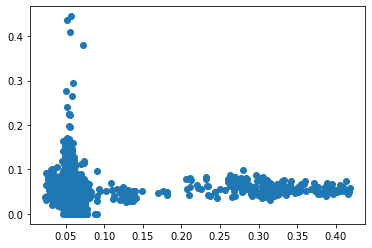